In [31]:
# Dependencies
import tweepy
import json
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret
from datetime import datetime
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import time

import plotly
plotly.tools.set_credentials_file(username='joelboyette', api_key='MBF4ThuV6dcFCF3unLzM')

import plotly.plotly as py
import plotly.graph_objs as go

In [34]:
tweet_text_analysis = pd.read_csv("tweet_data_all.csv",dtype={"Twitter_handle": object,
                                                     "Followers" : object,
                                                     "Time Retweeted" : object,
                                                     "Id":object,
                                                     "Times liked": object,
                                                    "Name" : object,
                                                     "Text": object,
                                                     "Time Stamp":object,
                                                     "Symbol": int} , index_col  = False)





C:\Users\joelb\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,Retweet,URL,Hashtag,@ Symbol
count,198032.000000,198032.000000,198032.000000,198032.000000
mean,0.079255,0.472722,0.294043,0.675093
std,0.270137,0.499257,0.455613,0.468341
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [36]:

#/^             //start of the string
#(?!.*\bRT\b)   //Verify that rt is not in the string.
#(?:.*\s)?      //Find optional chars and whitespace the
#                  //Note: (?: ) makes the group non-capturing.
#@\w+           //Find @ followed by one or more word chars.
#/i             //Make it case insensitive.
#r'^(@\w+)'



#^(?!.*?RT\s)
#At the beginning of string, look ahead to see that RT\s is not present, 
#.+\s@\w+
#then find one or more of characters followed by a @ and at least one letter, digit or underscore.

counter = 0

for index, row in tweet_text_analysis.iterrows():
    
    re_retweet = re.match(r'^(RT @)',row["Text"])
    re_url = re.findall(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',row["Text"])
    re_hash = re.findall(r'(?:\#+[\w_]+[\w\'_\-]*[\w_]+)',row["Text"])
    re_at = re.findall(r'(^|[^\w@/\!?=&])@(\w{1,15})\b',row["Text"])

    if re_retweet :
        tweet_text_analysis.loc[index,"Retweet"] = 1
    else:
        tweet_text_analysis.loc[index,"Retweet"] = 0
        
    if re_url:
        tweet_text_analysis.loc[index,"URL"] = 1
    else:
        tweet_text_analysis.loc[index,"URL"] = 0
        
    if re_hash:
        tweet_text_analysis.loc[index,"Hashtag"] = 1
    else:
        tweet_text_analysis.loc[index,"Hashtag"] = 0
        
    if re_at and not re_retweet:
        tweet_text_analysis.loc[index,"@ Symbol"] = 1
    else:
        tweet_text_analysis.loc[index,"@ Symbol"] = 0
    
    counter += 1
        
    # Print tweets for preview
    if counter % 100 == 0:
        print(f'rows processed {counter}')
    
        


rows processed 100
rows processed 200
rows processed 300
rows processed 400
rows processed 500
rows processed 600
rows processed 700
rows processed 800
rows processed 900
rows processed 1000
rows processed 1100
rows processed 1200
rows processed 1300
rows processed 1400
rows processed 1500
rows processed 1600
rows processed 1700
rows processed 1800
rows processed 1900
rows processed 2000
rows processed 2100
rows processed 2200
rows processed 2300
rows processed 2400
rows processed 2500
rows processed 2600
rows processed 2700
rows processed 2800
rows processed 2900
rows processed 3000
rows processed 3100
rows processed 3200
rows processed 3300
rows processed 3400
rows processed 3500
rows processed 3600
rows processed 3700
rows processed 3800
rows processed 3900
rows processed 4000
rows processed 4100
rows processed 4200
rows processed 4300
rows processed 4400
rows processed 4500
rows processed 4600
rows processed 4700
rows processed 4800
rows processed 4900
rows processed 5000
rows proc

rows processed 39700
rows processed 39800
rows processed 39900
rows processed 40000
rows processed 40100
rows processed 40200
rows processed 40300
rows processed 40400
rows processed 40500
rows processed 40600
rows processed 40700
rows processed 40800
rows processed 40900
rows processed 41000
rows processed 41100
rows processed 41200
rows processed 41300
rows processed 41400
rows processed 41500
rows processed 41600
rows processed 41700
rows processed 41800
rows processed 41900
rows processed 42000
rows processed 42100
rows processed 42200
rows processed 42300
rows processed 42400
rows processed 42500
rows processed 42600
rows processed 42700
rows processed 42800
rows processed 42900
rows processed 43000
rows processed 43100
rows processed 43200
rows processed 43300
rows processed 43400
rows processed 43500
rows processed 43600
rows processed 43700
rows processed 43800
rows processed 43900
rows processed 44000
rows processed 44100
rows processed 44200
rows processed 44300
rows processe

rows processed 78800
rows processed 78900
rows processed 79000
rows processed 79100
rows processed 79200
rows processed 79300
rows processed 79400
rows processed 79500
rows processed 79600
rows processed 79700
rows processed 79800
rows processed 79900
rows processed 80000
rows processed 80100
rows processed 80200
rows processed 80300
rows processed 80400
rows processed 80500
rows processed 80600
rows processed 80700
rows processed 80800
rows processed 80900
rows processed 81000
rows processed 81100
rows processed 81200
rows processed 81300
rows processed 81400
rows processed 81500
rows processed 81600
rows processed 81700
rows processed 81800
rows processed 81900
rows processed 82000
rows processed 82100
rows processed 82200
rows processed 82300
rows processed 82400
rows processed 82500
rows processed 82600
rows processed 82700
rows processed 82800
rows processed 82900
rows processed 83000
rows processed 83100
rows processed 83200
rows processed 83300
rows processed 83400
rows processe

rows processed 117100
rows processed 117200
rows processed 117300
rows processed 117400
rows processed 117500
rows processed 117600
rows processed 117700
rows processed 117800
rows processed 117900
rows processed 118000
rows processed 118100
rows processed 118200
rows processed 118300
rows processed 118400
rows processed 118500
rows processed 118600
rows processed 118700
rows processed 118800
rows processed 118900
rows processed 119000
rows processed 119100
rows processed 119200
rows processed 119300
rows processed 119400
rows processed 119500
rows processed 119600
rows processed 119700
rows processed 119800
rows processed 119900
rows processed 120000
rows processed 120100
rows processed 120200
rows processed 120300
rows processed 120400
rows processed 120500
rows processed 120600
rows processed 120700
rows processed 120800
rows processed 120900
rows processed 121000
rows processed 121100
rows processed 121200
rows processed 121300
rows processed 121400
rows processed 121500
rows proce

rows processed 154400
rows processed 154500
rows processed 154600
rows processed 154700
rows processed 154800
rows processed 154900
rows processed 155000
rows processed 155100
rows processed 155200
rows processed 155300
rows processed 155400
rows processed 155500
rows processed 155600
rows processed 155700
rows processed 155800
rows processed 155900
rows processed 156000
rows processed 156100
rows processed 156200
rows processed 156300
rows processed 156400
rows processed 156500
rows processed 156600
rows processed 156700
rows processed 156800
rows processed 156900
rows processed 157000
rows processed 157100
rows processed 157200
rows processed 157300
rows processed 157400
rows processed 157500
rows processed 157600
rows processed 157700
rows processed 157800
rows processed 157900
rows processed 158000
rows processed 158100
rows processed 158200
rows processed 158300
rows processed 158400
rows processed 158500
rows processed 158600
rows processed 158700
rows processed 158800
rows proce

rows processed 191700
rows processed 191800
rows processed 191900
rows processed 192000
rows processed 192100
rows processed 192200
rows processed 192300
rows processed 192400
rows processed 192500
rows processed 192600
rows processed 192700
rows processed 192800
rows processed 192900
rows processed 193000
rows processed 193100
rows processed 193200
rows processed 193300
rows processed 193400
rows processed 193500
rows processed 193600
rows processed 193700
rows processed 193800
rows processed 193900
rows processed 194000
rows processed 194100
rows processed 194200
rows processed 194300
rows processed 194400
rows processed 194500
rows processed 194600
rows processed 194700
rows processed 194800
rows processed 194900
rows processed 195000
rows processed 195100
rows processed 195200
rows processed 195300
rows processed 195400
rows processed 195500
rows processed 195600
rows processed 195700
rows processed 195800
rows processed 195900
rows processed 196000
rows processed 196100
rows proce

KeyboardInterrupt: 

In [39]:
tweet_text_analysis.to_csv("tweet_text_analysis_final.csv")

company_group = tweet_text_analysis.groupby("Name")

company_summary = company_group["Retweet"].sum()

company_summary 


Name
0                          0.0
20th Century Fox        1519.0
22                         0.0
3M                       110.0
8                          0.0
AIG                      185.0
AT&T                       0.0
AbbVie                   129.0
Abbott                   171.0
Accenture                323.0
Allergan plc              17.0
Allstate                  70.0
Altria                   133.0
Amazon.com               117.0
American Express          26.0
Amgen                    412.0
BNY Mellon                91.0
Bank of America          792.0
Berkshire HathawayHS     428.0
Biogen                   371.0
BlackRock                276.0
Booking Holdings         103.0
Bristol-Myers Squibb     258.0
CVS Health               158.0
Capital One              120.0
Caterpillar Inc.         146.0
Celgene Corporation      610.0
Chevron                  218.0
Cisco                    223.0
Citi                     584.0
                         ...  
NEW: @GetSpectrum          0.0
NVI

In [12]:

sum_retweet = abbvie_df["Retweet"].sum()
sum_url = abbvie_df["URL"].sum()
sum_hash = abbvie_df["Hashtag"].sum()
sum_at_symbol = abbvie_df["@ Symbol"].sum()
total_tweets = abbvie_df["Text"].count()


tweeter_metrics = pd.DataFrame({"Retweets": sum_retweet,
                                "URLs" :sum_url,
                                "Hashtags": sum_hash,
                                "@ Mentions": sum_at_symbol,
                                "Total Tweets" : total_tweets},index =abbvie_df["Twitter_handle"].unique())

tweeter_metrics = tweeter_metrics.reset_index()

tweeter_metrics =tweeter_metrics.rename(columns={"index": "Company"})

tweeter_metrics


,Company,@ Mentions,Hashtags,Retweets,Total Tweets,URLs
0,@abbvie,3.0,13.0,6.0,29,22.0


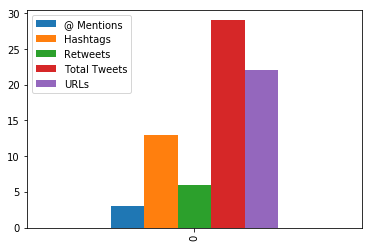

In [13]:
tweeter_metrics.plot.bar()

In [ ]:
data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.iplot(data, filename='basic-bar')

In [ ]:
sector = pd.read_csv("stocks.csv")

sector_list = sector["sector"].unique.drop_duplicates(keep=False)




In [ ]:

sector_list = sector_list.drop_duplicates(keep=False)